In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import hilbert, correlate
import time
import multiprocessing

In [56]:

# def fft(x):
#     N = len(x)
#     if N <= 1:
#         return x
#     even = fft(x[0::2])
#     odd = fft(x[1::2])
#     T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

# def ifft(X):
#     N = len(X)
#     if N <= 1:
#         return X
#     even = ifft(X[0::2])
#     odd = ifft(X[1::2])
#     T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [(even[k] + T[k]) / 2 for k in range(N // 2)] + [(even[k] - T[k]) / 2 for k in range(N // 2)]

In [57]:

def generate_signals(freq, sample_rate, duration, phase_diff):
    noise_mag = 0.1
    t = np.arange(0, duration, 1/sample_rate)
    
    signal1 = np.sin(2 * np.pi * freq * t + noise_mag*np.random.random(duration*sample_rate))
    signal2 = np.sin(2 * np.pi * freq * t + noise_mag*np.random.random(duration*sample_rate) + phase_diff )
    
    return t, signal1, signal2

In [70]:
t = np.arange(0, 1, 1/sample_rate)
t.shape

(1024,)

In [58]:

def cross_correlation_method(signal1, signal2, sample_rate, freq):
    start_time = time.time()
    
    corr = correlate(signal1, signal2)
    lag = np.argmax(corr) - len(signal1) + 1
    phase_diff = (lag / sample_rate) * freq * 2* np.pi
    
    runtime = time.time() - start_time
    return phase_diff, runtime

In [59]:

def fft_method(signal1, signal2, sample_rate, freq):
    start_time = time.time()
    
    N = len(signal1)
    fft1 = fft(signal1)
    fft2 = fft(signal2)
    
    # Find the dominant frequency's phase
    phase1 = np.angle(fft1[np.argmax(np.abs(fft1))])
    phase2 = np.angle(fft2[np.argmax(np.abs(fft2))])
    
    phase_diff = phase1 - phase2
    
    runtime = time.time() - start_time
    return -phase_diff, runtime


In [60]:

def hilbert_method(signal1, signal2, sample_rate, freq):
    start_time = time.time()
    
    analytic_signal1 = hilbert(signal1)
    analytic_signal2 = hilbert(signal2)
    
    phase1 = np.unwrap(np.angle(analytic_signal1))
    phase2 = np.unwrap(np.angle(analytic_signal2))
    
    phase_diff = np.mean(phase1 - phase2)
    
    runtime = time.time() - start_time
    return -phase_diff, runtime


def hilbert_method_2(signal1, signal2, sample_rate, freq):
    start_time = time.time()
    
    analytic_signal1 = hilbert_transform(signal1)
    analytic_signal2 = hilbert_transform(signal2)
    
    phase1 = np.unwrap(np.angle(analytic_signal1))
    phase2 = np.unwrap(np.angle(analytic_signal2))
    
    phase_diff = np.mean(phase1 - phase2)
    
    runtime = time.time() - start_time
    return -phase_diff, runtime

In [61]:
methods_l = [
    cross_correlation_method,
    fft_method,
    hilbert_method,hilbert_method_2]

In [72]:
freq = 10      # Frequency of the signals (Hz)
sample_rate = 1024  # Sampling rate (samples per second)
duration = 1   # Duration of the signals (seconds)
true_phase_diff = 1  # True phase difference in rad

# Generate signals
t, signal1, signal2 = generate_signals(freq, sample_rate, duration, true_phase_diff)

In [84]:
sample_rate/(2*np.pi*freq)

16.297466172610083

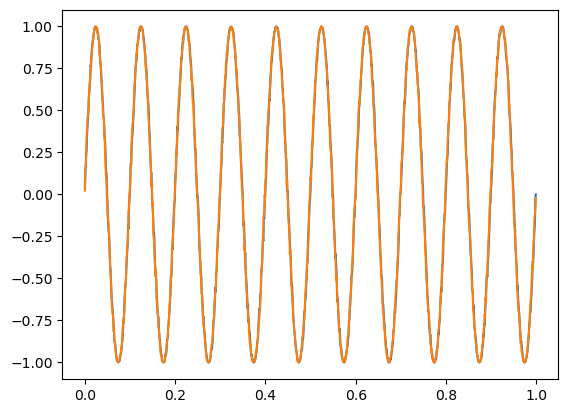

In [86]:
phase_diff, runtime = hilbert_method(signal1, signal2, sample_rate, freq)
phase_diff
plt.plot(t,signal1)
plt.plot(t,np.roll(signal2,int(sample_rate/(2*np.pi*freq))))

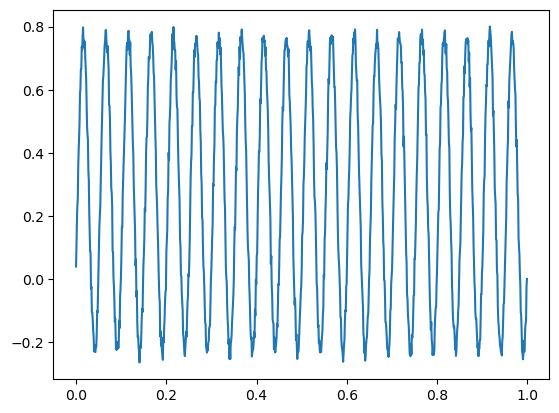

In [91]:
plt.plot(t,signal1*signal2)

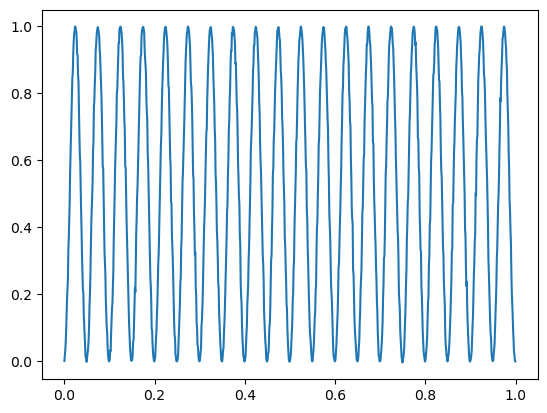

In [89]:
plt.plot(t,signal1*np.roll(signal2,int(sample_rate/(2*np.pi*freq))))

In [88]:
np.dot(signal1,np.roll(signal2,int(sample_rate/(2*np.pi*freq))))

511.6580708269723

In [51]:
methods = {
    "Cross-Correlation": cross_correlation_method,
    "FFT": fft_method,
    "Hilbert": hilbert_method,
    "Hilbert2": hilbert_method_2
}

Cross-Correlation Method:
  Phase Difference (deg): 0.9817
  Error (deg): 0.0183
  Runtime (s): 0.0005

FFT Method:
  Phase Difference (deg): 0.9990
  Error (deg): 0.0010
  Runtime (s): 0.0002

Hilbert Method:
  Phase Difference (deg): 0.9990
  Error (deg): 0.0010
  Runtime (s): 0.0004

Hilbert2 Method:
  Phase Difference (deg): 0.9990
  Error (deg): 0.0010
  Runtime (s): 0.0617



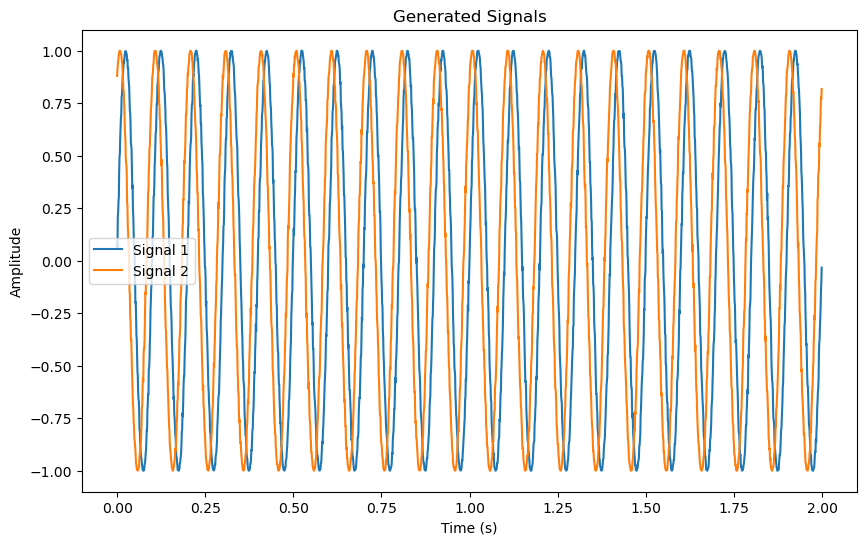

In [52]:
# Parameters
freq = 10      # Frequency of the signals (Hz)
sample_rate = 1024  # Sampling rate (samples per second)
duration = 2   # Duration of the signals (seconds)
true_phase_diff = 1  # True phase difference in rad

# Generate signals
t, signal1, signal2 = generate_signals(freq, sample_rate, duration, true_phase_diff)

# Calculate phase difference using different methods


results = {}
for method_name, method in methods.items():
        phase_diff, runtime = method(signal1, signal2, sample_rate, freq)
        error = np.abs(true_phase_diff - phase_diff)
        results[method_name] = {"Phase Difference (deg)": phase_diff, "Error (deg)": error, "Runtime (s)": runtime}

# Display results
for method_name, result in results.items():
    print(f"{method_name} Method:")
    for key, value in result.items():
        print(f"  {key}: {value:.4f}")
    print()

# Plot the signals (optional)
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='Signal 1')
plt.plot(t, signal2, label='Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Generated Signals')
plt.show()


In [17]:
generate_signals(1, 1024, 1, true_phase_diff)[2].shape

(1024,)

In [53]:
def compare(freq=10, sample_rate = 1024 ,duration = 1   ,true_phase_diff = 1 ,iterations=100):
    runtimes = np.zeros(4)
    errors = np.zeros(4)
    for j in range(iterations):



        t, signal1, signal2 = generate_signals(freq, sample_rate, duration, true_phase_diff)

        results = {}
        for i in range(4):
            method = methods_l[i]
            phase_diff, runtime = method(signal1, signal2, sample_rate, freq)
            error = np.abs(true_phase_diff - phase_diff)/true_phase_diff
            runtimes[i] += runtime
            errors[i] = error

    return errors/iterations, runtimes/iterations

            
            




In [54]:
compare()

(array([1.82522958e-04, 2.76946597e-05, 2.77050388e-05, 2.77050388e-05]),
 array([0.00022464, 0.00014651, 0.00031569, 0.03003439]))

In [138]:
freqs = np.array([10**i for i in range(-10,10)])
phase_diffs = np.arange(100)/100 * 2 *np.pi

vs_freqs_data_times=  np.zeros((freqs.shape[0],3))
vs_freqs_data_errors=   np.zeros((freqs.shape[0],3))

In [188]:
for i in range(freqs.shape[0]):
    print(i)
    vs_freqs_data_errors[i] , vs_freqs_data_times[i] = compare(freq=freqs[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [189]:
vs_freqs_data_times.shape

(20, 3)

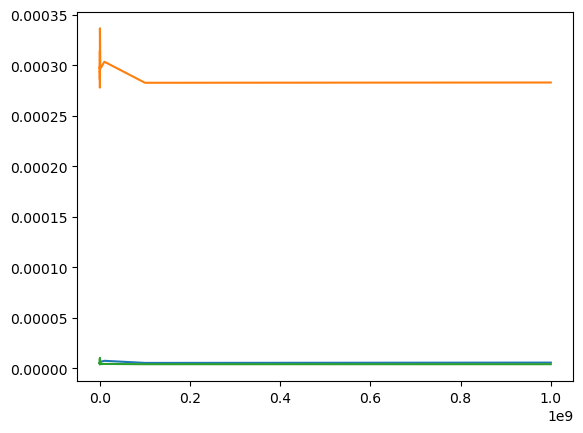

In [190]:
plt.plot(freqs,vs_freqs_data_times[:,0])
plt.plot(freqs,vs_freqs_data_times[:,1])
plt.plot(freqs,vs_freqs_data_times[:,2])

In [196]:
vs_freqs_data_errors

array([[1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997085e-03],
       [1.00000000e-02, 1.00000000e-02, 9.99997070e-03],
       [8.89553383e-03, 1.00000000e-02, 9.99997179e-03],
       [6.12037578e-04, 1.11022302e-18, 0.00000000e+00],
       [1.82522958e-04, 1.11022302e-18, 4.44089210e-18],
       [6.36310778e-02, 3.14159265e-02, 1.77635684e-17],
       [4.39514621e-01, 3.14159265e-02, 2.00000000e-02],
       [3.07796158e+00, 1.75415238e-16, 2.00000000e-02],
       [9.20488473e+01, 2.00000000e-02, 2.00000000e-02],
       [3.06806158e+02, 2.00000000e-02, 2.00000000e-02],
       [3.06795158e+03, 2.00000

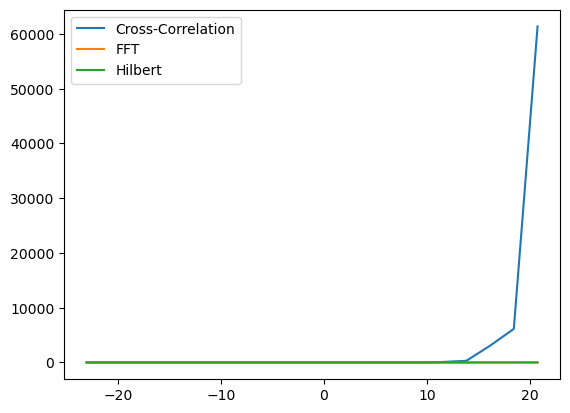

In [191]:
plt.plot(np.log(freqs),vs_freqs_data_errors[:,0])
plt.plot(np.log(freqs),vs_freqs_data_errors[:,1])
plt.plot(np.log(freqs),vs_freqs_data_errors[:,2])
plt.legend(   [ "Cross-Correlation","FFT","Hilbert"])

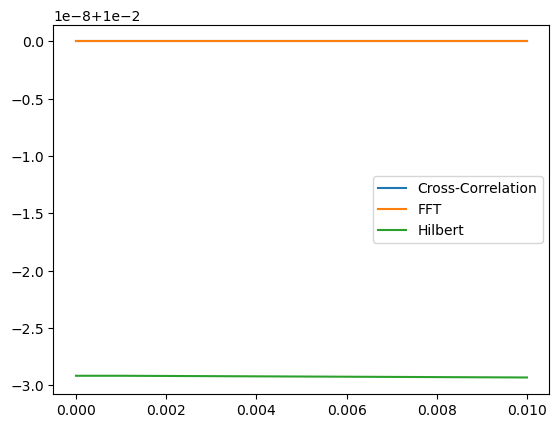

In [193]:
ind =9
plt.plot(freqs[:ind],vs_freqs_data_errors[:ind,0])
plt.plot(freqs[:ind],vs_freqs_data_errors[:ind,1])
plt.plot(freqs[:ind],vs_freqs_data_errors[:ind,2])
plt.legend(   [ "Cross-Correlation","FFT","Hilbert"])

In [159]:

def hilbert_method_2(signal1, signal2):
    start_time = time.time()

    def hilbert_transform(signal):
        n = len(signal)
        # Compute the FFT of the signal
        fft_signal = np.fft.fft(signal)
        
        # Create a frequency multiplier
        h = np.zeros(n)
        if n % 2 == 0:
            h[0] = h[n//2] = 1
            h[1:n//2] = 2
        else:
            h[0] = 1
            h[1:(n//2)+1] = 2
        
        # Apply the multiplier to the FFT signal
        fft_signal = fft_signal * h
        
        # Compute the inverse FFT to get the analytic signal
        analytic_signal = np.fft.ifft(fft_signal)
        
        return analytic_signal

    # Compute the analytic signals
    analytic_signal1 = hilbert_transform(signal1)
    analytic_signal2 = hilbert_transform(signal2)
    
    # Compute the instantaneous phase
    phase1 = np.angle(analytic_signal1)
    phase2 = np.angle(analytic_signal2)
    
    # Compute the phase difference
    phase_diff = np.mean(np.unwrap(phase1 - phase2))

    runtime = time.time() - start_time
    return -phase_diff, runtime

In [160]:

def fft_method_2(signal1, signal2, sample_rate):
    start_time = time.time()

    # Implement FFT from scratch
    def fft(signal):
        n = len(signal)
        if n <= 1:
            return signal
        even = fft(signal[0::2])
        odd = fft(signal[1::2])
        t = [np.exp(-2j * np.pi * k / n) * odd[k] for k in range(n // 2)]
        return [even[k] + t[k] for k in range(n // 2)] + [even[k] - t[k] for k in range(n // 2)]

    # Apply FFT to both signals
    fft1 = fft(signal1)
    fft2 = fft(signal2)

    # Convert FFT results to amplitudes and phases
    fft1_magnitude = np.abs(fft1)
    fft2_magnitude = np.abs(fft2)
    
    # Find the index of the dominant frequency
    dominant_index1 = np.argmax(fft1_magnitude)
    dominant_index2 = np.argmax(fft2_magnitude)
    
    # Calculate the phase difference at the dominant frequency
    phase1 = np.angle(fft1[dominant_index1])
    phase2 = np.angle(fft2[dominant_index2])
    
    phase_diff = phase1 - phase2

    runtime = time.time() - start_time
    return -phase_diff, runtime


In [152]:

def cross_correlation_method_2(signal1, signal2, sample_rate, freq):
    start_time = time.time()
    
    # Ensure the signals are of the same length
    n = len(signal1)
    
    # Compute the cross-correlation
    correlation = np.zeros(2*n - 1)
    for lag in range(-n + 1, n):
        if lag < 0:
            correlation[lag + n - 1] = np.sum(signal1[:lag] * signal2[-lag:])
        else:
            correlation[lag + n - 1] = np.sum(signal1[lag:] * signal2[:n - lag])
    
    # Find the index of the maximum correlation
    max_corr_index = np.argmax(correlation)
    
    # Calculate the lag
    lag = max_corr_index - (n - 1)
    
    # Calculate the phase difference
    phase_diff = (lag / sample_rate) * freq * 2*np.pi
    
    runtime = time.time() - start_time
    return phase_diff, runtime

In [158]:
hilbert_method_2(signal1,signal2)

(-0.9999999999999984, 0.0016334056854248047)

In [168]:
%%timeit
hilbert_method_2(signal1,signal2)

234 µs ± 15.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [169]:
%%timeit
cross_correlation_method_2(signal1,signal2,sample_rate,freq)

19.4 ms ± 424 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [163]:
fft_method_2(signal1,signal2,sample_rate)

IndexError: list index out of range

In [165]:
signal1.shape

(2000,)

In [1]:
import socket
import numpy as np
import time
import multiprocessing

def generate_sine_wave(frequency, sampling_rate, duration):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    return np.sin(2 * np.pi * frequency * t)

def stream_signal(signal, port):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as server_socket:
        server_socket.bind(('localhost', port))
        server_socket.listen(1)
        conn, addr = server_socket.accept()
        with conn:
            print(f"Connected by {addr}")
            for value in signal:
                conn.sendall(value.tobytes())

def start_server():
    sampling_rate = 1024  # Samples per second
    duration = 1  # Duration in seconds

    sine_wave_1 = generate_sine_wave(frequency=5, sampling_rate=sampling_rate, duration=duration)
    sine_wave_2 = generate_sine_wave(frequency=10, sampling_rate=sampling_rate, duration=duration)

    thread1 = multiprocessing.Process(target=stream_signal, args=(sine_wave_1, 65432))
    thread2 = multiprocessing.Process(target=stream_signal, args=(sine_wave_2, 65433))

    thread1.start()
    thread2.start()

    time.sleep(1)

    thread1.kill()
    thread2.kill()


if __name__ == "__main__":
    start_server()


In [11]:
%%timeit 
generate_sine_wave(5,1024,1)

23.1 µs ± 421 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [4]:
import socket
import numpy as np

def receive_signal(port):
    signal = []
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as client_socket:
        client_socket.connect(('localhost', port))
        while True:
            data = client_socket.recv(4)  # Assuming float32 format, 4 bytes
            if not data:
                break
            value = np.frombuffer(data, dtype=np.float32)
            signal.append(value[0])
    return np.array(signal)

def start_client():
    while True:

        signal_1 = receive_signal(65432)
        signal_2 = receive_signal(65433)

        # Do something with the received signals
        print(f"Received Signal 1: {signal_1[:10]}")
        print(f"Received Signal 2: {signal_2[:10]}")

if __name__ == "__main__":
    start_client()


ConnectionRefusedError: [Errno 111] Connection refused

In [5]:
%%timeit 
np.zeros(1024)

335 ns ± 8.12 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [7]:
%%timeit 
np.save("testArray",np.zeros(1024))

101 µs ± 6.45 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [34]:
def fft_imp(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft_imp(x[0::2])
    odd = fft_imp(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

def ifft_imp(X):
    N = len(X)
    if N <= 1:
        return X
    even = ifft_imp(X[0::2])
    odd = ifft_imp(X[1::2])
    T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [(even[k] + T[k]) / 2 for k in range(N // 2)] + [(even[k] - T[k]) / 2 for k in range(N // 2)]

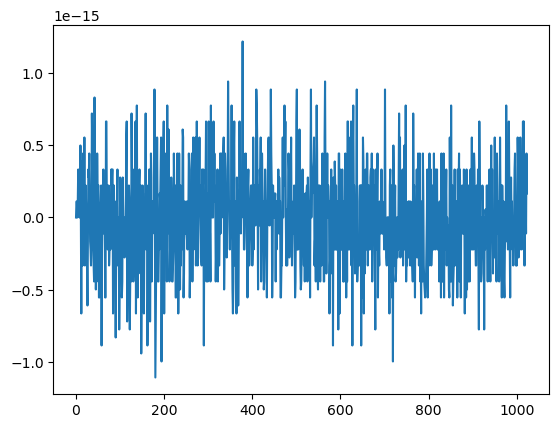

In [40]:
signal = np.sin(1000 * np.arange(1024))
# plt.plot(np.arange(1024),fft(signal) - np.array(fft_imp(signal)))
plt.plot(np.arange(1024),hilbert(signal) - hilbert_transform(signal))

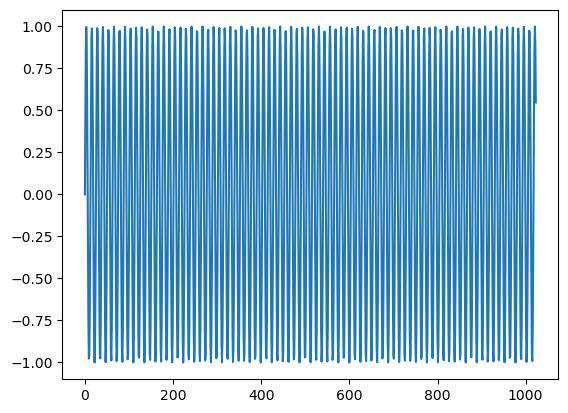

In [13]:
plt.plot(np.arange(1024),signal)

In [30]:
def hilbert_transform(signal):
    # Compute the FFT of the input signal
    N = len(signal)
    X = fft_imp(signal)

    # Create the filter: 1 for positive frequencies, 0 for negative frequencies
    H = np.zeros(N)
    if N % 2 == 0:
        H[0] = 1
        H[1:N//2] = 2
        H[N//2] = 1
    else:
        H[0] = 1
        H[1:(N+1)//2] = 2
    
    # Apply the filter to the FFT of the signal
    X_filtered = X * H

    # Compute the inverse FFT to get the analytic signal
    analytic_signal = ifft_imp(X_filtered)

    return analytic_signal

In [32]:
hilbert

<function scipy.signal._signaltools.hilbert(x, N=None, axis=-1)>